## FAI1 - Practical Deep Learning I
Homework Jupyter Notebook for Lesson 1: Image Classification

See the full course at: http://course.fast.ai/

## Setup & Imports
Keras requires a directory structure based on the classes you are looking at. Our directory structure will be as follows:

In [14]:
# dogscats/
#     train/
#         dogs/
#         cats/
#     valid/
#         dogs/
#         cats/
#     test/
#         dogs/
#         cats/
#     sample/
#         <same as for dogscats/>

In [15]:
# Making sure python knows where to look for my utilities folder (it's in this notebook's parent folder).
# I know the naming can be confusing, but it's to not get in the way of the imports below
from os import path as ospath, getcwd; from sys import path as syspath
current_dir = getcwd()
syspath.insert(1, ospath.join(current_dir, '../utils'))
syspath.insert(1, ospath.join(current_dir, '..'))

Setup matplotlib to plot inside the notebook, import NumPy, SciPy, VGG, and the appropriate Keras libraries.

In [16]:
# this ensures matplotlib plots within this window
%matplotlib inline
# path to my sample data directory. Contains 180 imgs in ../train/ and 20 
# imgs in ../valid/ The full dataset contains 25,000 imgs.
# path = 'data/dogscats/sample/'
path = 'data/dogscats/'
# The libraries to be imported (taken from https://github.com/fastai/courses/blob/master/deeplearning1/nbs/lesson1.ipynb)
from __future__ import division, print_function
import os, json
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt
import utils; reload(utils)
from utils import plots
import vgg16; reload(vgg16)
from vgg16 import Vgg16

## Vgg16 Image Recognition Example

We'll do a small test-run of Vgg16 to show what the data & labels look like. Afterwards we'll finetune & fit the model to our dataset (so that Vgg16 is looking for cats vs dogs instead of its standard 1,000 categories), run it on our full test set, and create a submissions csv file to upload to Kaggle and get scored.

First create a Vgg16 object:

In [17]:
vgg = Vgg16()

Get some batches from the sample training folder. vgg.get_batches(..) is an iterator that returns a batch of images and their labels, indefinitely.

In [18]:
batches = vgg.get_batches(path+'train',batch_size=4)

Found 20000 images belonging to 2 classes.


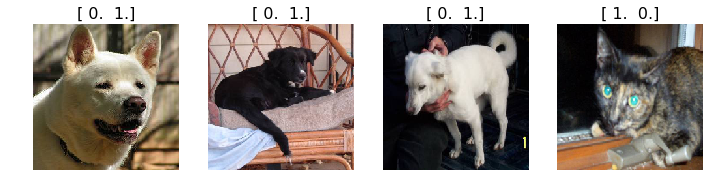

In [19]:
imgs, labels = next(batches)
plots(imgs, titles=labels)

To get an idea of the categories Vgg16 usually works with, here're the first 5:

In [20]:
vgg.classes[:5]

[u'tench', u'goldfish', u'great_white_shark', u'tiger_shark', u'hammerhead']

## Vgg16 finetuned for Dogs vs Cats:
What we do now is finetune and fit our model to our specific dataset. Finetuning further trains a pre-trained Machine-Learning model (Vgg16). A training set is trained on, and a validation set is tested against. In finetuning, we're only changing a small subset of our model's parameters since our pre-trained model is already very close to our final desired model. This is done by calling fit() after calling finetune()

In [22]:
batch_size = 32
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


Calling fineunte() modifies the model so that it'll be trained based on the data in the batches provided: dog vs cat. The model's parameters are then fitted using the training data, and accuracy is reported using teh validation set. An epoch is 1 full pass through the training data.

In [23]:
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
20000/20000 [==============================] - 7920s - loss: 0.1363 - acc: 0.9686 - val_loss: 0.0749 - val_acc: 0.9798

# More training
To try and get into the top 50% of the Cats v Dogs Redux competition, I'm going to train the model for a few more epochs and see how that works out. I'm also going to tune the learning rate to η = 0.01 and see how that works. Since the first epoch took just under 2 hours, I'm going to save the weights from it, just in case.

In [24]:
# Save the weights from the first epoch
vgg.model.save_weights(path + 'ft1.hd5')

In [ ]:
nb_epoch = 3
vgg.model.optimizer.lr = 0.01
for epoch in xrange(nb_epoch):
    print "Starting Epoch %d" % epoch
    vgg.fit(batches, val_batches, nb_epoch=nb_epoch)
print "Completed %d fit operations" % nb_epoch

The model is ready to classify dogs vs cats. In order to complete this assignment, we'll have to create a csv (comma-separated-values) file of IDs and labels of the full 25,000 set of images and upload it to Kaggle for scoring.

First modify the path to the full dataset:

In [25]:
path = 'data/dogscats/'

vgg.test(..) will return the entire set of batches & predictions (labels). We'll extract the ID-number from batches.filenames, and the label from the second column of predictions.

In [26]:
batches, predictions = vgg.test(path+'test',batch_size=batch_size)
filenames = batches.filenames

Found 12500 images belonging to 1 classes.


The syntax for getting the IDs below is: make an array of the index of the period plus one, to fourth-from-end character, of each item f in filenames. The file extensions are all ".jpg" which is 4 characters long, and the ID number of each file comes after a period as such: "dog.0010.jpg" or "cat.1001.jpg" & etc.

In [28]:
# ids = np.array([int(f[f.find('.')+1:-4]) for f in filenames])
ids = np.array([int(f[8:f.find('.')]) for f in filenames])
dog_predictions = predictions[:,1]

# NOTE: this is important due to logloss error: clip the probabilities
dog_predictions = dog_predictions.clip(min=0.05, max=0.95)
# dog_predictions = np.clip(dog_predictions, 0.05, 0.95) # in case .clip doesn't work
# you know what's funny, as I'm writing this I have no clue where the clip function is coming from..
# Python? NumPy? Utils?

submission = np.stack([ids, dog_predictions], axis=1)
submission_file_name = 'submission_HW1_.csv'
np.savetxt(submission_file_name, submission, fmt='%d,%.5f',header='id,label',comments='')

In [29]:
%pwd

u'C:\\Users\\Wayne\\Informatik\\FastAiCourse\\Kaukasos\\FAI\\lesson1'

And that's it kurzgesagt.
Find the original Jupyter Notebook here: https://github.com/fastai/courses/blob/master/deeplearning1/nbs/lesson1.ipynb

And a great walkthrough here: https://github.com/fastai/courses/blob/master/deeplearning1/nbs/dogs_cats_redux.ipynb

WH Nixalo - 1 Seli 2017 12:47

# Results:
1 May 2017 -- single finetune & fitting epoch, default η: 

* E =  0.16309, Rank: 734/1314

6 May 2017 -- 4 epochs, η = 0.01 for last 3: 

* E = TBA